# Data Analyst - Standing on Giants
## Exercise #1
### 1) Provide a visual representation of this data correlated and aggregated per month


## Data Cleaning

For the accomplishment of this task I will first proceed to the cleaning of the data to facilitate its manipulation, aggregation and visualization.
First I will clean the "New Posts" dataset (using the vectorized strings techniques) and then I will continue with the "Post Views" dataset (in which I used datetime techniques).

Once this task is done, the data will be aggregated by month and then correlated for analysis.

The result of this exercise (the visualization) is at the end of the notebook. You can advance directly to this part of the document if you wish.


### New Posts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

new_posts = pd.read_csv("New Posts per day 2018-10-01.2019.10.31 - newpostsdetails.csv")
post_views = pd.read_csv("Post Views per day 2018-10-01.2019.10.31 - postviewsdetails.csv")


In [2]:
new_posts.info() #getting info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
Daily New Posts - from 2018-10-01 to 2019-10-31    397 non-null object
Unnamed: 1                                         397 non-null object
dtypes: object(2)
memory usage: 6.3+ KB


In [3]:
new_posts.isnull().sum() #looking for missing values

Daily New Posts - from 2018-10-01 to 2019-10-31    0
Unnamed: 1                                         0
dtype: int64

In [4]:
new_posts.head(4)

,Daily New Posts - from 2018-10-01 to 2019-10-31,Unnamed: 1
0,Date,Total New Posts
1,"October 31, 2019",99
2,"October 30, 2019",90
3,"October 29, 2019",102


In [5]:
new_posts.columns

Index(['Daily New Posts - from 2018-10-01 to 2019-10-31', 'Unnamed: 1'], dtype='object')

In [6]:
new_posts = new_posts.rename(columns={'Daily New Posts - from 2018-10-01 to 2019-10-31':"date", 'Unnamed: 1':"total new posts"})
new_posts = new_posts.drop([0], axis=0)
new_posts.head(4)

,date,total new posts
1,"October 31, 2019",99
2,"October 30, 2019",90
3,"October 29, 2019",102
4,"October 28, 2019",83


In [7]:
new_posts["total new posts"] = new_posts["total new posts"].astype("int")

In [8]:
new_posts_split = new_posts["date"].str.lower().str.split()
new_posts_month = new_posts_split.str[0]
new_posts_year = new_posts_split.str[2]

print(new_posts_split[:15])

1     [october, 31,, 2019]
2     [october, 30,, 2019]
3     [october, 29,, 2019]
4     [october, 28,, 2019]
5     [october, 27,, 2019]
6     [october, 26,, 2019]
7     [october, 25,, 2019]
8     [october, 24,, 2019]
9     [october, 23,, 2019]
10    [october, 22,, 2019]
11    [october, 21,, 2019]
12    [october, 20,, 2019]
13    [october, 19,, 2019]
14    [october, 18,, 2019]
15    [october, 17,, 2019]
Name: date, dtype: object


In [9]:
print(new_posts_month[:15])

1     october
2     october
3     october
4     october
5     october
6     october
7     october
8     october
9     october
10    october
11    october
12    october
13    october
14    october
15    october
Name: date, dtype: object


In [10]:
print(new_posts_year[:15])

1     2019
2     2019
3     2019
4     2019
5     2019
6     2019
7     2019
8     2019
9     2019
10    2019
11    2019
12    2019
13    2019
14    2019
15    2019
Name: date, dtype: object


In [11]:
new_posts["date"] = new_posts_month
new_posts["year"] = new_posts_year
new_posts.head()

,date,total new posts,year
1,october,99,2019
2,october,90,2019
3,october,102,2019
4,october,83,2019
5,october,64,2019


In [12]:
new_posts_agg = new_posts.groupby(["date","year"])["total new posts", "year","date"].mean()
new_posts_agg

,,total new posts
date,year,
april,2019,56.500000
august,2019,72.161290
december,2018,61.225806
february,2019,81.035714
january,2019,70.967742
july,2019,65.032258
june,2019,69.800000
march,2019,70.806452
may,2019,61.774194


In [13]:
new_post_agg_data = {"date":["october","november","december","january", "february", "march", "april", "may", "june", "july", "august", "september", "october"], 
                 "year":["2018", "2018", "2018","2019","2019","2019","2019","2019","2019","2019","2019","2019","2019"], 
                 "total new posts":[96.548387, 108.366667, 61.225806,70.967742, 81.035714, 70.806452, 56.500000, 61.774194, 69.800000, 65.032258, 72.161290, 74.333333, 92.000000]}
new_post_agg_sorted = pd.DataFrame(new_post_agg_data)
new_post_agg_sorted

,date,year,total new posts
0,october,2018,96.548387
1,november,2018,108.366667
2,december,2018,61.225806
3,january,2019,70.967742
4,february,2019,81.035714
5,march,2019,70.806452
6,april,2019,56.500000
7,may,2019,61.774194
8,june,2019,69.800000
9,july,2019,65.032258


### Post views

In [14]:
post_views.info() #getting info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
Daily Post Views - from 2018-10-01 to 2019-10-31    397 non-null object
Unnamed: 1                                          397 non-null object
dtypes: object(2)
memory usage: 6.3+ KB


In [15]:
post_views.isnull().sum() #looking for missing values

Daily Post Views - from 2018-10-01 to 2019-10-31    0
Unnamed: 1                                          0
dtype: int64

In [16]:
post_views.head(10) #quick look of the distribution of the dataframe

,Daily Post Views - from 2018-10-01 to 2019-10-31,Unnamed: 1
0,Date,Total Post Views
1,"October 31, 2019",143801
2,"October 30, 2019",123591
3,"October 29, 2019",110920
4,"October 28, 2019",146609
5,"October 27, 2019",141058
6,"October 26, 2019",157195
7,"October 25, 2019",182723
8,"October 24, 2019",160912
9,"October 23, 2019",157759


In [17]:
post_views.columns

Index(['Daily Post Views - from 2018-10-01 to 2019-10-31', 'Unnamed: 1'], dtype='object')

In [18]:
post_views = post_views.rename(columns={'Daily Post Views - from 2018-10-01 to 2019-10-31':"date", 'Unnamed: 1':"total post views"})
post_views[:15]

,date,total post views
0,Date,Total Post Views
1,"October 31, 2019",143801
2,"October 30, 2019",123591
3,"October 29, 2019",110920
4,"October 28, 2019",146609
5,"October 27, 2019",141058
6,"October 26, 2019",157195
7,"October 25, 2019",182723
8,"October 24, 2019",160912
9,"October 23, 2019",157759


In [19]:
post_views = post_views.drop([0], axis=0)

In [21]:
post_views["date"] = pd.to_datetime(post_views["date"])
post_views["year"] = post_views["date"].dt.year
post_views["date"] = post_views["date"].dt.month

import calendar
post_views["date"] = post_views["date"].apply(lambda x: calendar.month_name[x]).str.lower()
post_views["total post views"] = post_views["total post views"].astype("int")

In [22]:
post_views[:15]

,date,total post views,year
1,october,143801,2019
2,october,123591,2019
3,october,110920,2019
4,october,146609,2019
5,october,141058,2019
6,october,157195,2019
7,october,182723,2019
8,october,160912,2019
9,october,157759,2019
10,october,100193,2019


In [23]:
post_views_agg = post_views.groupby(["date","year"])["total post views", "year"].mean()
post_views_agg

,,total post views,year
date,year,,
april,2019,14416.933333,2019.0
august,2019,52516.161290,2019.0
december,2018,15864.064516,2018.0
february,2019,17013.964286,2019.0
january,2019,15575.903226,2019.0
july,2019,17867.387097,2019.0
june,2019,13872.600000,2019.0
march,2019,13346.935484,2019.0
may,2019,11821.870968,2019.0


In [24]:
total_post_views_agg_data = {"date":["october","november","december","january", "february", "march", "april", "may", "june", "july", "august", "september", "october"], 
                 "year":["2018", "2018", "2018","2019","2019","2019","2019","2019","2019","2019","2019","2019","2019"], 
                 "total post views":[12554.096774, 18963.833333, 15864.064516, 15575.903226, 17013.964286, 13346.935484, 14416.933333, 11821.870968, 13872.600000, 17867.387097, 52516.161290, 90999.500000, 155090.806452]}
total_post_views_agg_sorted = pd.DataFrame(total_post_views_agg_data)
total_post_views_agg_sorted

,date,year,total post views
0,october,2018,12554.096774
1,november,2018,18963.833333
2,december,2018,15864.064516
3,january,2019,15575.903226
4,february,2019,17013.964286
5,march,2019,13346.935484
6,april,2019,14416.933333
7,may,2019,11821.870968
8,june,2019,13872.600000
9,july,2019,17867.387097


### Joining the DataFrames

In [27]:
posts_data_merge = pd.merge(left=new_post_agg_sorted,right=total_post_views_agg_sorted, on=["date","year"])
posts_data_merge

,date,year,total new posts,total post views
0,october,2018,96.548387,12554.096774
1,november,2018,108.366667,18963.833333
2,december,2018,61.225806,15864.064516
3,january,2019,70.967742,15575.903226
4,february,2019,81.035714,17013.964286
5,march,2019,70.806452,13346.935484
6,april,2019,56.500000,14416.933333
7,may,2019,61.774194,11821.870968
8,june,2019,69.800000,13872.600000
9,july,2019,65.032258,17867.387097


In [32]:
posts_data_merge["month_year"] = posts_data_merge["date"] + " " + posts_data_merge["year"]
posts_data_merge

,date,year,total new posts,total post views,month_year
0,october,2018,96.548387,12554.096774,october 2018
1,november,2018,108.366667,18963.833333,november 2018
2,december,2018,61.225806,15864.064516,december 2018
3,january,2019,70.967742,15575.903226,january 2019
4,february,2019,81.035714,17013.964286,february 2019
5,march,2019,70.806452,13346.935484,march 2019
6,april,2019,56.500000,14416.933333,april 2019
7,may,2019,61.774194,11821.870968,may 2019
8,june,2019,69.800000,13872.600000,june 2019
9,july,2019,65.032258,17867.387097,july 2019


In [40]:
correlation = posts_data_merge[9:] #removing the outliers

# Visual representation

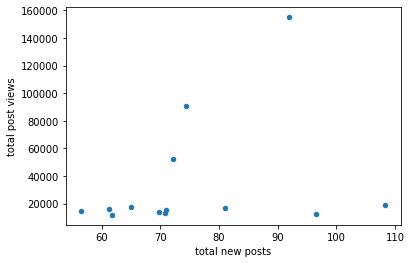

In [34]:
%matplotlib inline
posts_data_merge.plot(x="total new posts", y="total post views", kind="scatter")

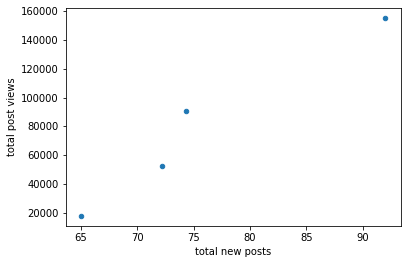

In [39]:
correlation.plot(x="total new posts", y="total post views", kind="scatter")

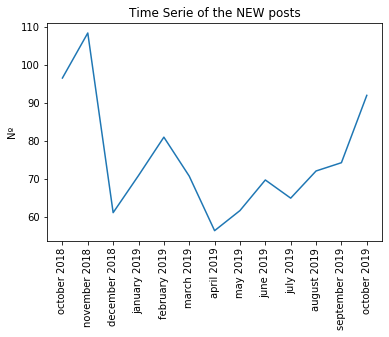

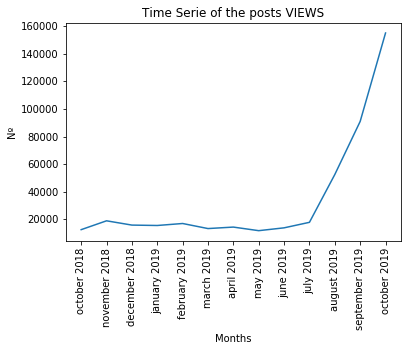

In [30]:
plt.plot(posts_data_merge["month_year"], posts_data_merge["total new posts"])
plt.xticks(rotation=90)
plt.title("Time Serie of the NEW posts")
plt.ylabel("Nº")
plt.show()

plt.plot(posts_data_merge["month_year"], posts_data_merge["total post views"])
plt.title("Time Serie of the posts VIEWS")
plt.xticks(rotation=90)
plt.ylabel("Nº")
plt.xlabel("Months")
plt.show()
